In [1]:
import torch
import torch.nn as nn

In [7]:
# Define the MLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    
class Wrapper(nn.Module):
    def __init__(self, mlp):
        super(Wrapper,self).__init__()
        self.mlps = {'m': mlp}
        self.mlps = nn.ModuleDict(self.mlps)

    def forward(self,x):
        return self.mlps['m'](x)
    
classifier = SimpleMLP(2,10,3)
wrapper = Wrapper(classifier)

In [8]:
wrapper.eval()
wrapper.mlps['m'].training

False

In [10]:
import matplotlib.pyplot as plt
import numpy as np

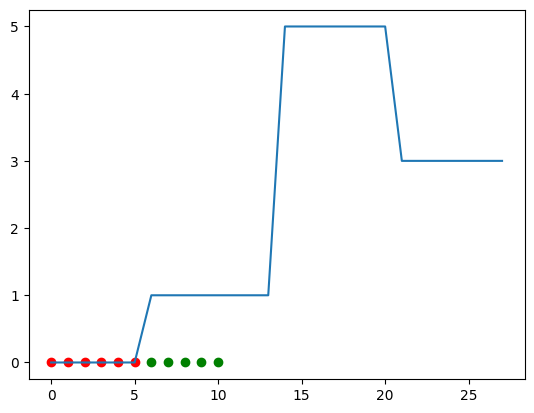

In [14]:
plt.plot(np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,3,3,3,3,3,3,3]))
plt.scatter(np.array([0,1,2,3,4,5]),np.array([0,0,0,0,0,0]),c='r')
plt.scatter(np.array([6,7,8,9,10]),np.array([0,0,0,0,0]),c='g')